# Trayectorias de vehiculos - Biblioteca EVQueues.jl

In [1]:
#using Pkg; Pkg.update()
using EVQueues, Plots

In [2]:
lambda=40.0;
mu=1.0;
gamma=1.0;
C=20.0;

Tfinal=50.0;

snaps = collect(0:0.01:Tfinal);

In [3]:
sim = ev_lifo(lambda,mu,gamma,Tfinal,C,snapshots=snaps)
compute_statistics!(sim)

Simulando... 100%|██████████████████████████████████████| Time: 0:00:00


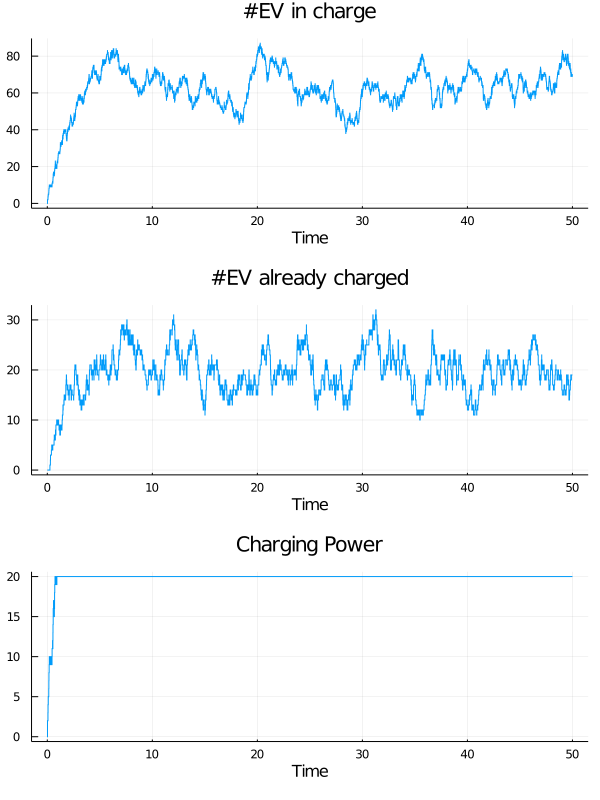

In [4]:
plot(sim.timetrace)

In [5]:
#Dictionary with vehicle trajectories
d = get_vehicle_trajectories(sim);

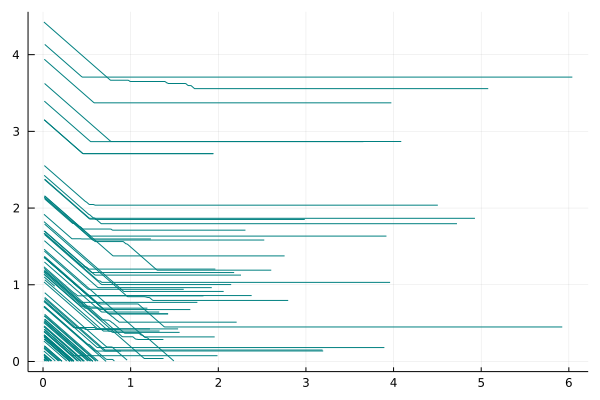

In [6]:
p=plot(legend=:none);

using StatsBase

#I choose n cars to display
n=100
trajectories = collect(values(d))
K = sample((1:length(trajectories)),n)

for k=K

    trace = trajectories[k];

    t = [z[1] for z in trace]
    sigma = [z[2] for z in trace]
    tau = [z[3] for z in trace]

    plot!(p,t,sigma, color=:teal)
end
p